<a href="https://colab.research.google.com/github/gmazzitelli/studenti/blob/master/generate_DS_3D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Inizializzation.

This Cell download and intstall ROOT in python 2 environment. 

Runs this part of the script only when you have to init a new machine e and working space

In [2]:
# istallazione di ROOT dal CERN
!mkdir -p APPS
!pwd
!cd APPS && wget --no-check-certificate https://root.cern.ch/download/root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz 
!cd APPS && tar -xf root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz

base_lib_path = '/content/APPS/root/lib/'
# main paths for ROOT  
import sys
sys.path.append(base_lib_path)
import ctypes
sys.path.append(base_lib_path)
ctypes.cdll.LoadLibrary(base_lib_path+'libCore.so')
ctypes.cdll.LoadLibrary(base_lib_path+'libThread.so')
ctypes.cdll.LoadLibrary(base_lib_path+'libImt.so')
ctypes.cdll.LoadLibrary(base_lib_path+'libRIO.so')
ctypes.cdll.LoadLibrary(base_lib_path+'libNet.so')
ctypes.cdll.LoadLibrary(base_lib_path+'libTree.so')
ctypes.cdll.LoadLibrary(base_lib_path+'libMathCore.so')
ctypes.cdll.LoadLibrary(base_lib_path+'libMatrix.so')
ctypes.cdll.LoadLibrary(base_lib_path+'libHist.so')
ctypes.cdll.LoadLibrary(base_lib_path+'libGraf.so')
# itsllation and root-numpy main PATH
!pip install root-numpy
ctypes.cdll.LoadLibrary(base_lib_path+'libMultiProc.so')
ctypes.cdll.LoadLibrary(base_lib_path+'libGpad.so')
ctypes.cdll.LoadLibrary(base_lib_path+'libGraf3d.so')
ctypes.cdll.LoadLibrary(base_lib_path+'libTreePlayer.so')
# patch to open online FILE
! sudo apt-get install libdavix0v5
ctypes.cdll.LoadLibrary(base_lib_path+'libRDAVIX.so')
! echo "Davix.GSI.CACheck: n" >> $ROOTSYS/etc/system.rootrc
! cp $ROOTSYS/etc/system.rootrc $HOME/.rootrc
! tail -1 $HOME/.rootrc
! pip install -q  python-swiftclient
! pip install -q  keystoneauth1
! pip install -q  h5py

/content
--2020-05-23 15:31:58--  https://root.cern.ch/download/root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz
Resolving root.cern.ch (root.cern.ch)... 137.138.13.143, 2001:1458:201:45::100:b
Connecting to root.cern.ch (root.cern.ch)|137.138.13.143|:443... connected.
  Issued certificate has expired.
HTTP request sent, awaiting response... 200 OK
Length: 137415272 (131M) [application/x-gzip]
Saving to: ‘root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz’

root_v6.13.08.Linux 100%[===================>] 131.05M  26.5MB/s    in 5.7s    

2020-05-23 15:32:04 (23.0 MB/s) - ‘root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz’ saved [137415272/137415272]

     |████████████████████████████████| 522kB 2.8MB/s 
  Created wheel for root-numpy: filename=root_numpy-4.8.0-cp27-cp27mu-linux_x86_64.whl size=1075578 sha256=078d986fa9499f47e3438dc854eb049306ba1f7c509d53469ef4d021a6b4b5ab
  Stored in directory: /root/.cache/pip/wheels/f0/3c/18/62ccf3aec0284175916617d699f179d7cdbe4de0c7070be2a5
Successf

This Cell Load funcions (libraries) to retrive data from swift CYGNO server

Runs this part of the script only when you have to init a new machine e and working space

In [0]:
import sys
import matplotlib.pyplot as plt
import numpy as np    
import ROOT
import root_numpy as rtnp
! rm cygnus_lib.*; rm mylib.*
! wget https://raw.githubusercontent.com/gmazzitelli/cygno/master/cygnus_lib.py
! wget https://raw.githubusercontent.com/gmazzitelli/cygno/master/mylib.py
sys.path.append('.')
import cygnus_lib as cy
import mylib as my
%matplotlib inline
import pandas as pd
from scipy.optimize import curve_fit
from scipy.stats import chisquare
import scipy.stats as stats
from itertools import combinations
import math
import os

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

x_resolution = y_resolution = 2048
cy.set_atlas_style('square')
!mkdir -p data

Welcome to JupyROOT 6.13/08
rm: cannot remove 'cygnus_lib.*': No such file or directory
rm: cannot remove 'mylib.*': No such file or directory
--2020-05-18 07:21:06--  https://raw.githubusercontent.com/gmazzitelli/cygno/master/cygnus_lib.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24130 (24K) [text/plain]
Saving to: ‘cygnus_lib.py’

cygnus_lib.py       100%[===================>]  23.56K  --.-KB/s    in 0.01s   

2020-05-18 07:21:07 (1.88 MB/s) - ‘cygnus_lib.py’ saved [24130/24130]

--2020-05-18 07:21:08--  https://raw.githubusercontent.com/gmazzitelli/cygno/master/mylib.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)

Generate data stream file looking for close clusters in any images: 

1.   download pedestal file [run_ped]
2.   download dafa file/s [runI] from specifc location [dataSelection]
3.   Serch for cluster with DBSCAN
4.   save output in txt file


In [0]:
!ls
! tail $HOME/.rootrc

APPS  cygnus_lib.py  cygnus_lib.pyc  data  mylib.py  mylib.pyc	sample_data
#               1.0 enable automatic cache to fit one cluster (default)
# Can be overridden by the environment variable ROOT_TTREECACHE_SIZE
# TTreeCache.Size: 1.0

# Set the default TTreeCache prefilling type.
# The prefill type may be: 0 No Prefill
#                          1 All Branches (default)
# Can be overridden by the environment variable ROOT_TTREECACHE_PREFILL
# TTreeCache.Prefill: 1
Davix.GSI.CACheck: n


In [0]:
runI          = [2098] 
run_ped       = 2054 
cimax         = 300
cimin         = 0 
dataSelection = 'LAB'
rescale       = 512
nsigma        = 1.5


try:
  fh5 = ("run%d_mean.h5" % (run_ped))
  cmd = 'wget -nv https://raw.githubusercontent.com/gmazzitelli/cygno/master/data/'+fh5+' -O ./data/'+fh5
  os.system(cmd)
  fh5 = ("run%d_sigma.h5" % (run_ped))
  cmd = 'wget -nv https://raw.githubusercontent.com/gmazzitelli/cygno/master/data/'+fh5+' -O ./data/'+fh5
  os.system(cmd)
except:
  print ("No Pedestal file for run %s on remote repo" % run_ped)
  print ("STOP")
  sys.exit(1)

#########################

try:
  fileoutm = ("./data/run%d_mean.h5" % (run_ped))
  m_image = cy.read_image_h5(fileoutm)
  PedOverMax = m_image[m_image > cimax].size
  print ("Pedestal mean: %.2f, sigma: %.2f, over th. (%d) %d" % 
    (m_image[m_image<cimax].mean(), 
    np.sqrt(m_image[m_image<cimax].var()), cimax,
    (m_image>cimax).sum()))
except:
  print ("No Pedestal file for run %s, run script runs-pedestals.ipynb" % run_ped)
  print ("STOP")
  sys.exit(1)
 
try: 
  fileouts = ("./data/run%d_sigma.h5" % (run_ped))
  s_image = cy.read_image_h5(fileouts)
  print ("Sigma mean: %.2f, sigma: %.2f, over th. (50) %d" % 
    (s_image[s_image<50].mean(), 
    np.sqrt(s_image[s_image<50].var()), 
    (s_image>50).sum()))
except:
  print ("No Sigma file for run %s, run script runs-pedestals.ipynb" % run_ped)
  print ("STOP")
  sys.exit(1)

#########################

th_image   = np.round(m_image + nsigma*s_image)
print ("light over Th: %.2f " % (th_image.sum()-m_image.sum()))
    
for nRi in range(len(runI)):
  try:
    print ('Open file: '+cy.swift_root_file(dataSelection, runI[nRi]))
    f = ROOT.TFile.Open(cy.swift_root_file(dataSelection, runI[nRi]))

    print ('Find Keys: '+str(len(f.GetListOfKeys())))
    pic, wfm = cy.root_TH2_name(f)
    max_image = len(pic)
    max_wfm = len(wfm)
    print ("# of Images (TH2) Files: %d " % (max_image))
    print ("# of Waveform (TH2) Files: %d " % (max_wfm))
    nImag=max_image
  except:
    print ("ERROR: No file %d" % (runI[nRi]))
    break
  # data_to_save = []
  # files = ("./data/dbscan_run%d_cmin_%d_cmax_%d_rescale_%d_nsigma_%.1f_ev_%d_ped_%d.txt" % 
  #                 (runI[nRi], cimin, cimax, rescale, nsigma, max_image, run_ped))

  df = pd.DataFrame(columns = ["iTr", "cluster_lable", "pixels", "photons", "ph_pixels", "x0start", "y0start", 
          "x0end", "y0end", "width", "height", "pearson"])

  file_out = ("./data/dbscan_run%d_cmin_%d_cmax_%d_rescale_%d_nsigma_%.1f_ev_%d_ped_%d.plk.gz" % 
                    (runI[nRi], cimin, cimax, rescale, nsigma, max_image, run_ped))
  for iTr in range(0, max_image):
    if iTr % 10 == 0: 
      # running & debug ...
      print ('Processing RUN: ', runI[nRi], 'Event: ', iTr)

      # end 

    image = rtnp.hist2array(f.Get(pic[iTr])).T

    rebin_image     = cy.rebin(image-m_image, (rescale, rescale))  
    rebin_th_image  = cy.rebin((th_image-m_image), (rescale, rescale))

    edges           = (rebin_image > rebin_th_image) & (rebin_image < cimax)         
    points          = np.array(np.nonzero(edges)).T.astype(float) 
    scaler          = StandardScaler()
    X_scaled        = scaler.fit_transform(points)

    dbscan          = DBSCAN(eps=0.05, min_samples = 2)
    dbscan.fit(points)

    clusters = dbscan.fit_predict(X_scaled)

    for ic in range (min(dbscan.labels_), max(dbscan.labels_)):
        ph = 0.
        # print ("value: ", iTr, ic, dbscan.labels_[ic], min(dbscan.labels_), max(dbscan.labels_))
        yc = points[:,1][dbscan.labels_==ic]
        xc = points[:,0][dbscan.labels_==ic]
        ph, dim = cy.cluster_par(yc, xc, rebin_image)
        width, height, pearson = cy.confidence_ellipse_par(yc,xc)
        for j in range(0, dim):
            x=int(xc[j])
            y=int(yc[j])
            #ph += rebin_image[y,x]
            if j == 0:
                x0start = x
                y0start = y
        x0end = x
        y0end = y
        df = df.append({"iTr":iTr, "cluster_lable":ic, "pixels":dim, "photons":ph, "ph_pixels":ph/dim, "x0start":x0start, "y0start":y0start, 
          "x0end":x0end, "y0end":y0end, "width":width, "height":height, "pearson":pearson},
                       ignore_index=True)
        # data_to_save.append([iTr, ic, dim, ph, ph/dim, 
        #                       x0start, y0start, x0end, y0end, width, height, pearson])
      
  # np.savetxt(files, data_to_save, fmt='%.10e', delimiter=" ")
  df.to_pickle(file_out, compression='gzip')
  print ("out file", files)

Pedestal mean: 99.57, sigma: 0.91, over th. (300) 9
Sigma mean: 2.52, sigma: 2.14, over th. (50) 7
light over Th: 15841590.89 
Open file: https://swift.cloud.infn.it:8080/v1/AUTH_1e60fe39fba04701aa5ffc0b97871ed8/Cygnus/Data/LAB/histograms_Run02098.root
Find Keys: 2006
# of Images (TH2) Files: 1003 
# of Waveform (TH2) Files: 1003 
('Processing RUN: ', 2098, 'Event: ', 0)


KeyboardInterrupt: ignored

2020-05-16 10:58:48 URL:https://raw.githubusercontent.com/gmazzitelli/cygno/master/data/run2054_mean.h5 [33556480/33556480] -> "./data/run2054_mean.h5" [1]
2020-05-16 10:58:49 URL:https://raw.githubusercontent.com/gmazzitelli/cygno/master/data/run2054_sigma.h5 [33556480/33556480] -> "./data/run2054_sigma.h5" [1]


In [0]:
# outputs (.h5 are the pedestal files)
!ls data

da fare:
1.   studiarsi DBSCAN e come vengono selzionati i dati
2.   mostrare il risultato di cluserizzazione di DBSCAN su ogni imagine (fare un debug delo script mostrando le immagini)
2.   con panda caricare i file di output
2.   guardarsi le varie variabili, visualizzarli, capire che significano
3.   fare la distribuzione del numero di fotoni
4.   fittarla con un esponenziale (coda del fondo) piu' gaussina (picco dei fotoni)
5.   studiare l'andamento del picco del ferro nel tempo per i run pari tra 1856 e 2031





In [0]:
def TGraph2array(tgraph):
  xl = []; yl = []
  for i in range(tgraph.GetN()):
      xi = ctypes.c_double(); yi = ctypes.c_double()
      tgraph.GetPoint(i,xi,yi)
      xl.append(xi.value)
      yl.append(yi.value)
  x = np.array(xl)
  y = np.array(yl)
  return x, y

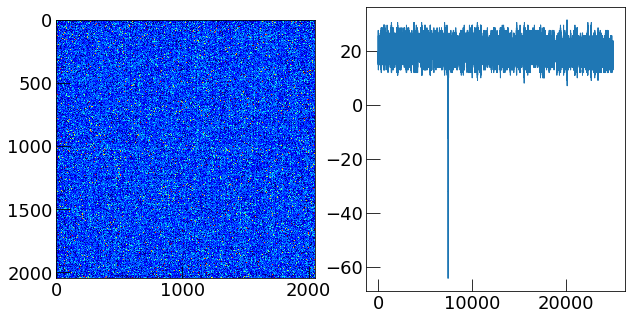

In [0]:
# mostra l'immagine iTr del file ...
fig, ax = plt.subplots (1,2, figsize=(10,5))
iTr = 2
#
f  = ROOT.TFile.Open('https://swift.cloud.infn.it:8080/v1/AUTH_1e60fe39fba04701aa5ffc0b97871ed8/Cygnus/Data/LAB/histograms_Run01856.root');
pic, wfm = cy.root_TH2_name(f)
#
image = rtnp.hist2array(f.Get(pic[iTr])).T
t,a = TGraph2array(f.Get(wfm[iTr]))
ax[0].imshow(image,  cmap="jet", vmin=95,vmax=120)
ax[1].plot(t,a)
plt.show()

In [0]:
image_norm = (image-image.mean())/image.std()

array([[ 0.02145704, -0.31811792, -0.7142887 , ..., -0.09173462,
        -0.09173462, -0.03513879],
       [-0.03513879, -0.26152208,  0.19124451, ..., -0.20492627,
         0.13464868, -0.09173462],
       [ 0.02145704,  0.02145704, -0.14833045, ..., -0.09173462,
        -0.03513879, -0.09173462],
       ...,
       [-0.31811792,  0.13464868, -0.09173462, ..., -0.60109705,
        -0.09173462, -0.14833045],
       [-0.03513879,  0.07805286,  0.4176278 , ..., -0.26152208,
         0.19124451, -0.09173462],
       [ 0.07805286,  0.07805286, -0.09173462, ...,  0.07805286,
         0.02145704,  0.30443618]], dtype=float32)

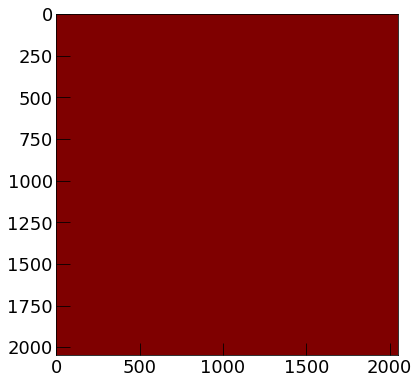

In [0]:
plt.imshow(image,  cmap="jet", vmin=0,vmax=1)
plt.show()


In [0]:
db = DBSCAN(eps=0.1, min_samples=1).fit(image)
labels = db.labels_
from collections import Counter
Counter(labels)

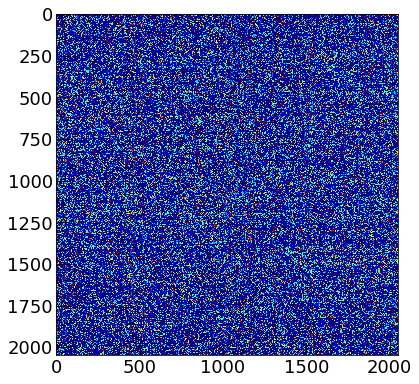

In [0]:
plt.imshow(X_scaled,  cmap="jet", vmin=0,vmax=1)
plt.show()

In [0]:
X_scaled

array([[ 0.04253569, -0.07103372,  0.22367099, ..., -1.1248979 ,
        -0.0252915 ,  0.20527534],
       [-1.38165649, -1.01876698,  0.22367099, ...,  0.82705372,
         0.47037351,  0.20527534],
       [-3.04321403,  0.87669955, -0.47568501, ..., -0.14892209,
         1.95736854, -0.50049505],
       ...,
       [-0.43219504, -0.78183367, -0.24256635, ..., -2.34486765,
        -1.01662152,  0.20527534],
       [-0.43219504,  0.63976623, -0.00944768, ..., -0.14892209,
         0.96603852, -0.02998146],
       [-0.19482968, -0.30796704, -0.24256635, ..., -0.39291604,
        -0.27312401,  1.14630252]])

In [0]:
from sklearn.cluster import DBSCAN
import numpy as np
noise = np.random.rand(x_resolution,x_resolution)

db = DBSCAN(eps=0.12, min_samples=1).fit(noise)
labels = db.labels_
from collections import Counter
Counter(labels)

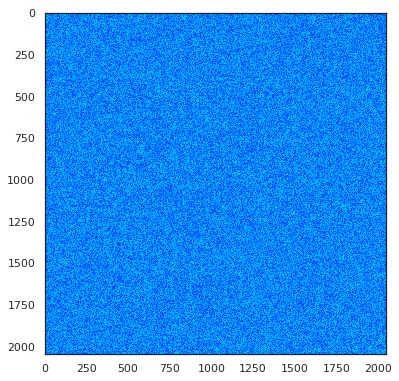

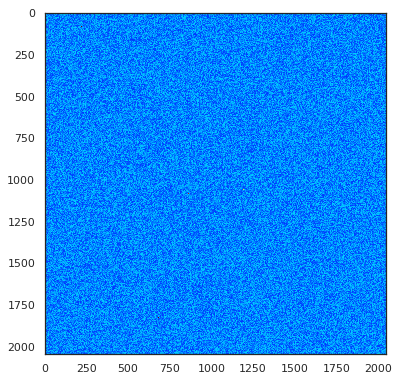

In [0]:
from sklearn.datasets import make_blobs
noise = np.random.rand(x_resolution,y_resolution)*2.5*1.5+99.5
sin_imege = np.copy(noise)
plt.imshow(noise, cmap="jet" , vmin=95,vmax=120)
plt.show()
density = 1000
spot = 5
blobs_points, blobs_labels = make_blobs(n_samples=density*spot, centers=spot, n_features=3, random_state=6, center_box=(0, x_resolution))
for k in range(spot):
  intensity = blobs_points[:, 2][blobs_labels==k]
  blobs_points[:, 2][blobs_labels==k]=(intensity-intensity.mean())/intensity.std()
  blobs_points[:, 2][blobs_labels==k]=blobs_points[:, 2][blobs_labels==k]+abs(blobs_points[:, 2][blobs_labels==k].min())
for j in range(len(blobs_points)):
  x = int(blobs_points[j][0])
  y = int(blobs_points[j][1])
  z = int(blobs_points[j][2])
  sin_imege[x,y] += z
  #print(x,y,z, noise[x,y],  sin_imege[x,y])

#plt.scatter(blobs_points[:, 0], blobs_points[:, 1], c=blobs_labels)
plt.imshow(sin_imege, cmap="jet" , vmin=95,vmax=120)
plt.show()

In [0]:
blobs_labels

array([3, 3, 4, 1, 1, 0, 2, 3, 3, 3, 2, 1, 0, 4, 4, 0, 3, 1, 0, 1, 2, 0,
       0, 4, 4, 2, 3, 2, 1, 2, 4, 3, 3, 4, 2, 0, 2, 1, 3, 0, 2, 3, 0, 2,
       1, 1, 4, 4, 3, 4, 2, 2, 2, 1, 1, 2, 4, 1, 0, 4, 4, 1, 2, 3, 2, 2,
       3, 1, 0, 3, 4, 2, 2, 3, 3, 1, 3, 3, 0, 1, 0, 4, 3, 3, 2, 4, 3, 0,
       3, 0, 2, 2, 3, 0, 4, 3, 1, 0, 2, 4, 0, 0, 3, 0, 3, 2, 3, 1, 0, 1,
       4, 2, 1, 4, 4, 0, 0, 2, 4, 0, 4, 2, 2, 3, 4, 1, 2, 4, 0, 2, 4, 3,
       4, 1, 3, 1, 3, 3, 1, 4, 3, 2, 0, 3, 1, 0, 1, 1, 3, 4, 0, 1, 4, 0,
       1, 4, 4, 1, 1, 3, 3, 3, 3, 3, 0, 0, 1, 1, 4, 4, 3, 0, 1, 2, 1, 4,
       2, 2, 2, 2, 1, 3, 2, 1, 1, 2, 3, 3, 4, 0, 2, 1, 4, 4, 3, 3, 4, 4,
       0, 4, 1, 4, 0, 4, 3, 2, 0, 2, 4, 2, 0, 2, 3, 2, 1, 0, 1, 3, 3, 1,
       2, 4, 4, 0, 2, 0, 2, 1, 4, 0, 2, 4, 0, 0, 1, 0, 1, 1, 0, 3, 2, 1,
       1, 3, 3, 3, 4, 3, 3, 4, 1, 4, 1, 0, 4, 2, 3, 2, 2, 4, 1, 0, 0, 2,
       1, 3, 0, 1, 3, 3, 1, 0, 4, 3, 4, 0, 0, 1, 2, 2, 0, 3, 0, 1, 4, 4,
       3, 1, 1, 1, 0, 2, 4, 1, 0, 3, 1, 2, 3, 3, 4,

In [0]:
  x = int(blobs_points[j][0])
  y = int(blobs_points[j][1])
  z = int(blobs_points[j][2])
  print(x,y,z, noise[x,y])

(1273, 898, 0, 102.07284320345718)


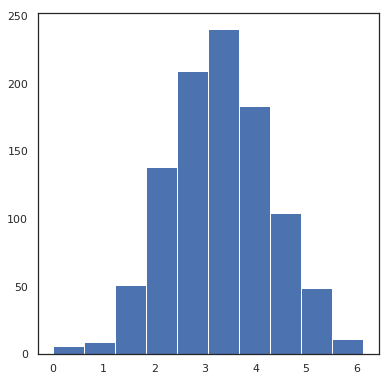

In [0]:
plt.hist(blobs_points[:, 2][blobs_labels==3])
plt.show()

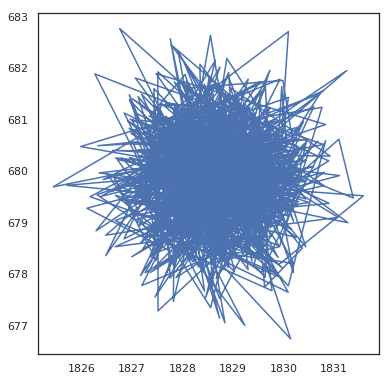

In [0]:
l = 0
plt.plot(blobs_points[:,0][blobs_labels==l],blobs_points[:,1][blobs_labels==l])
plt.show()

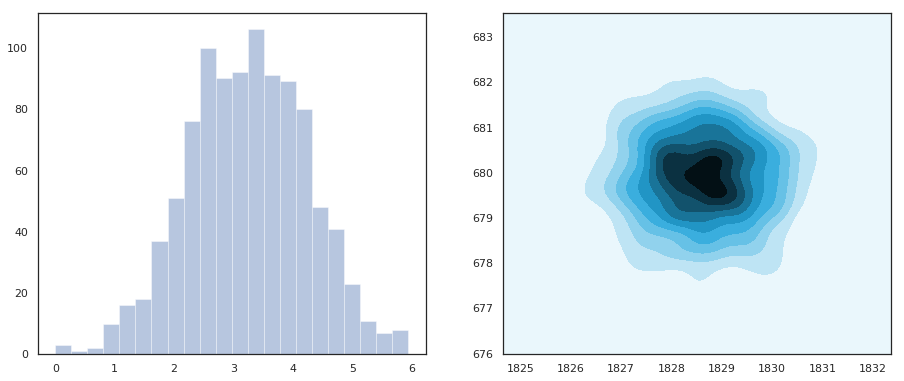

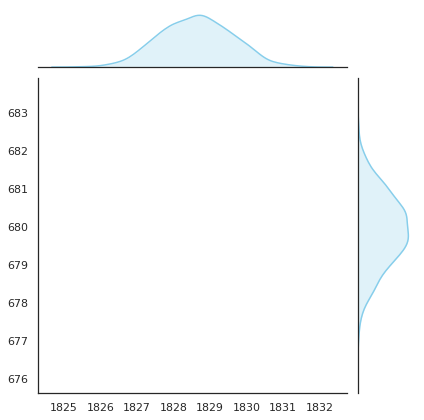

In [0]:
import seaborn as sns
fig, ax = plt.subplots(1,2, figsize=(15,6))
sns.distplot(blobs_points[:,2][blobs_labels==l], kde=False, ax=ax[0])
sns.set(style="white", color_codes=True)
sns.jointplot(blobs_points[:,0][blobs_labels==l],blobs_points[:,1][blobs_labels==l], kind='kde', color="skyblue", ax=ax[1])

plt.show()